# Predicting Insights into Audiobook Trends

## Table of Contents

* [Introduction](#itr) 
  + [Phase 1 Summary](#summary)
  + [Report Overview](#overview)
  + [Overview of Methodology](#methodology)
* [Data Prepocessing](data)
* [Predictive Modelling](#modeling)
  + [Feature Selection](#feature)
  + [Model Fitting & Tuning](#tuning)
  + [Neural Network Model Fitting & Tuning](#neural)
* [Critique & Limitations](#limitation)
* [Summary & Conclusions](#summary)
  +[Project Summary](#ps)
  +[Summary of Findings](#finding)
  +[Conclusions](#conclusion)


## Introduction <a id='itr'></a>

### Phase 1 Summary <a id='summary'></a>

The preprocessing and exploration of the audiobook dataset involved several crucial steps to prepare the data for predictive modeling. Initially, data cleaning was performed to remove unnecessary prefixes from the `author` and `narrator` columns and improve the readability of names by adding spaces between uppercase letters. This step ensures that the categorical data is clean and meaningful for analysis.

Feature transformation was then carried out to convert the `time` feature from a string format representing hours and minutes to a numerical format in total minutes. This transformation is essential for any numerical analysis and modeling. The `releasedate` feature was also converted to a datetime format, allowing for time-based analysis and the creation of features such as the year of release. Additionally, the `stars` feature was split into two separate columns: `stars` (average rating) and `total ratings` (number of ratings). The `price` feature was standardized by replacing 'Free' with '0' and converting it to a numerical format. Lastly, the `language` feature was uniformly capitalized to ensure consistency.

Data exploration involved conducting univariate analysis to understand the distribution of individual features like `time`, `stars`, and `price`. Bivariate analysis was performed to explore relationships between two variables, such as `price` vs. `total ratings` and `time` vs. `stars`, while multivariate analysis examined interactions among three variables like `time`, `stars`, and `total ratings`. These steps provided valuable insights into feature importance, distributions, and potential interactions, which are crucial for feature selection and engineering in predictive modeling.

Overall, the preprocessing and exploration steps ensured that the dataset is clean, standardized, and well-understood, providing a solid foundation for developing accurate and reliable predictive models for audiobook prices. This preparation allows for the effective use of regression models and other machine learning techniques to predict the price of audiobooks based on the available descriptive features.

### Report Overview <a id='overview'></a>

The Phase 2 report delves into the development and optimization of multiple machine learning models aimed at predicting book ratings, specifically the 'Stars(out of 5)'. The process began with feature selection, followed by an intensive model training phase, employing a variety of regression techniques and a neural network.

Initially, Linear Regression was chosen as the baseline model. GridSearchCV was used to fine-tune the model by adjusting parameters such as whether to fit the intercept. This tuning process identified the optimal configuration, which was then trained on the dataset. The model’s performance was evaluated by calculating the Mean Squared Error (MSE) on the test set, providing a benchmark for comparison with more complex models.

A Decision Tree Regressor was the next model explored. Again, GridSearchCV played a crucial role in optimizing parameters like the maximum depth of the tree and the minimum number of samples per leaf. The model, trained with the best parameters, was evaluated for its predictive accuracy, focusing on its ability to avoid overfitting.

The K-Nearest Neighbors (KNN) Regressor was implemented to capture local data patterns. GridSearchCV was utilized to find the optimal number of neighbors and the appropriate weighting function. This model was trained on the selected features and evaluated using the MSE, highlighting its capacity to predict ratings based on the nearest neighbors in the feature space.

Gradient Boosting Regressor was also tested, with hyperparameters such as the number of boosting stages, learning rate, and the maximum depth of estimators being fine-tuned through GridSearchCV. This model, designed to handle complex relationships within the data, was trained and evaluated to determine its effectiveness in improving prediction accuracy.

Alongside these traditional regression models, a neural network model was developed. The architecture included an input layer, a hidden layer, and an output layer, with the Adam optimizer used for compiling the model. Initial training with a basic architecture was expanded upon through systematic experimentation with different configurations of neurons, learning rates, batch sizes, epochs, and activation functions. Each configuration was tested to minimize the validation loss, ultimately leading to an optimized neural network.

In conclusion, the report documents a comprehensive approach to model training, utilizing GridSearchCV for parameter optimization and systematically evaluating each model’s performance using the MSE. This structured methodology ensured that the best possible models were developed for predicting the 'Stars(out of 5)' ratings, providing a solid foundation for accurate and reliable predictions.

### Overview of Methodology <a id='methodology'></a>

The model training phase of the project focused on developing and fine-tuning several machine learning models to predict the 'Stars(out of 5)' rating for books. The initial step involved selecting the features and the target variable, followed by splitting the data into training and testing sets. This established a solid foundation for model training and subsequent evaluation.

The first model explored was Linear Regression. Using GridSearchCV, various parameters were tuned, including whether to fit the intercept. The optimal model parameters were identified, and the model was trained on the training data. The Mean Squared Error (MSE) on the test set was calculated to assess its performance. This approach ensured that the model was adjusted to best fit the training data, while also evaluating its ability to generalize to new data.

Next, a Decision Tree Regressor was implemented. GridSearchCV was utilized again to optimize the hyperparameters, specifically the maximum depth of the tree and the minimum number of samples required to be at a leaf node. The training process involved fitting the model with these optimal parameters to the training data. The model's performance was then evaluated by calculating the MSE on the test set, providing insights into its predictive accuracy and potential overfitting or underfitting issues.

The K-Nearest Neighbors (KNN) Regressor was another model explored during this phase. GridSearchCV was used to determine the best number of neighbors and the weight function used in prediction. The optimal KNN model was trained on the training dataset, and its performance was evaluated using the test set MSE. This model's ability to capture local patterns in the data was critically assessed through this process.

A Gradient Boosting Regressor was also trained and tuned using GridSearchCV. The hyperparameters tuned included the number of boosting stages, the learning rate, and the maximum depth of the individual estimators. The optimal combination of these parameters was found, and the model was trained accordingly. Evaluating the MSE on the test set provided a measure of the model's performance and its capability to handle complex data relationships through boosting.

The model training phase involved a thorough exploration and tuning of several machine learning algorithms, each evaluated for their predictive performance using the MSE metric. 

## Data Preprocesing <a id='data'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

In [2]:
data = pd.read_csv("Phase2_Group90.csv")

In [3]:
books = data.sample(frac=0.05, random_state=1)

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4374 entries, 41094 to 77700
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              4374 non-null   object 
 1   Author            4374 non-null   object 
 2   Narrator          4374 non-null   object 
 3   Time(in minutes)  4374 non-null   int64  
 4   Releasedate       4374 non-null   object 
 5   Language          4374 non-null   object 
 6   Stars(out of 5)   4374 non-null   float64
 7   Price             4374 non-null   float64
 8   Total ratings     4374 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 341.7+ KB


Here we sampled 3% of the dataset, because we had 87489 entries. Also, to enhance manageability and expedite model training and testing processes. Using a smaller subset allows us to iterate quickly and identify and resolve potential issues more efficiently during the development and debugging phases. This approach ensures computational efficiency while retaining enough data to derive meaningful insights and accurately assess model performance. Once we refine and validate the models and methodologies on the sample, we can effectively scale them up to the full dataset for final deployment.

## Predictive Modelling <a id='modeling'></a>

### Feature Selection <a id='feature'></a>

Feature selection is a critical step in the machine learning pipeline. It involves selecting a subset of relevant features (variables, predictors) from the original set of features. The goal of feature selection is to improve the performance of a model by removing irrelevant, redundant, or noisy data that can negatively impact the model's performance. Feature selection can lead to simpler, more interpretable models and reduce the computational cost of model training and prediction.

In [5]:
# Encode categorical variables
encoder = LabelEncoder()
categorical_columns = ['Name', 'Author', 'Narrator', 'Language', 'Releasedate']
for column in categorical_columns:
    books[column] = encoder.fit_transform(books[column])

 This code encodes categorical variables into numerical values using LabelEncoder. Categorical features such as 'Name', 'Author', 'Narrator', 'Language', and 'Releasedate' are transformed into integer labels.

In [6]:
# Convert 'Releasedate' to Unix timestamp
books['Releasedate'] = pd.to_datetime(books['Releasedate']).astype('int64') / 1e9

This line converts the 'Releasedate' from a string or standard datetime format to a Unix timestamp (the number of seconds since January 1, 1970). This numerical representation is easier for models to process and can capture temporal trends.

In [7]:
# Define the features and target
X = books.drop('Stars(out of 5)', axis=1)
y = books['Stars(out of 5)']

# Splitting the books into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here, X and y are defined as the features and target variable for the machine learning models, respectively. X includes all columns except the target ('Stars(out of 5)'), while y is just the target column.
Split function: This function splits the dataset into training (80%) and testing (20%) sets. The random_state parameter ensures that the split is reproducible.

In [8]:
# Feature Selection with Linear Regression
linear_model = LinearRegression()
rfe = RFE(estimator=linear_model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]

This segment performs feature selection using Recursive Feature Elimination (RFE) with a Linear Regression model. RFE iteratively removes the least important features to identify the top 5 features that contribute most to predicting the target variable. This helps in reducing the dimensionality of the dataset and focusing on the most relevant features.

In [9]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

#### Correlation Heatmap <a id='heat'></a>

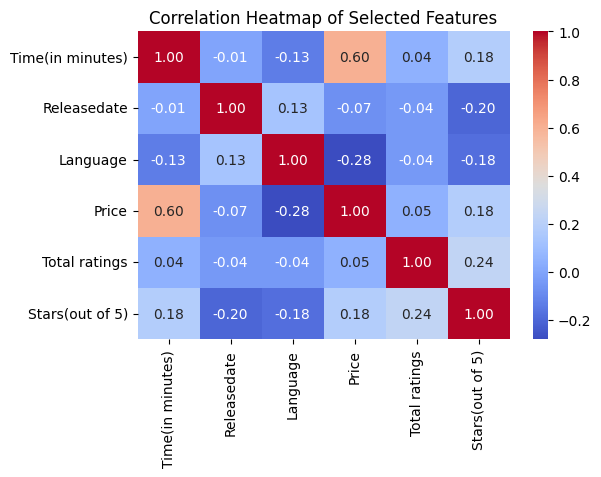

In [10]:
# Correlation heatmap for the selected features and target
correlation_matrix = pd.concat([X_train_selected, y_train], axis=1).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

Observations from the Heatmap
1. Price and Time (in minutes): There is a strong positive correlation (0.62) between "Price" and "Time (in minutes)". This suggests that longer audiobooks tend to be priced higher.
2. Stars (out of 5) and Total ratings: There is a moderate positive correlation (0.22) between the "Stars(out of 5)" and "Total ratings". This could indicate that audiobooks with higher ratings tend to receive more ratings, possibly due to higher popularity or better visibility.
3. Low Correlation with Releasedate: The "Releasedate" seems to have very little correlation with most other features, including the target "Stars(out of 5)", which suggests that the release date of an audiobook doesn't strongly influence its ratings or other characteristics like price or duration.

Strategic Insights
1. Features with high correlation to the target variable ("Stars(out of 5)") might be good predictors and should be considered in predictive modeling.
2. The lack of strong correlation between "Stars(out of 5)" and most features suggests that predicting the star rating might require complex models or the inclusion of interaction terms to capture more nuanced relationships.
3. The strong correlation between "Price" and "Time (in minutes)" could be utilized to analyze pricing strategies or to segment audiobooks into different categories based on their length.

### Model Fitting and Tuning <a id='tuning'></a>

Each model is trained on the selected features from the training set and then used to make predictions on the test set. The Mean Squared Error (MSE) is calculated to evaluate the performance of each model, indicating how closely the predicted values match the actual values.

**Linear Regression**

In [11]:
linear_params = {'fit_intercept': [True, False]}
grid_linear = GridSearchCV(LinearRegression(), linear_params, cv=5, scoring='neg_mean_squared_error')
grid_linear.fit(X_train_selected, y_train)
print("Best parameters for Linear Regression:", grid_linear.best_params_)
predictions_linear = grid_linear.predict(X_test_selected)
mse_linear = mean_squared_error(y_test, predictions_linear)
print("MSE of Linear Regression:", mse_linear)



Best parameters for Linear Regression: {'fit_intercept': True}
MSE of Linear Regression: 2.6555125369632617


The parameter 'fit_intercept', which determines whether to calculate the intercept for this model. The two options tested were 'True' and 'False'.

Result: The best parameter found was 'fit_intercept': True. This means that the model is better off fitting an intercept.


**Decision Tree Regressor**

In [12]:
dt_params = {'max_depth': range(1, 10), 'min_samples_leaf': range(1, 5)}
grid_dt = GridSearchCV(DecisionTreeRegressor(), dt_params, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train_selected, y_train)
print("Best parameters for Decision Tree Regressor:", grid_dt.best_params_)
predictions_dt = grid_dt.predict(X_test_selected)
mse_dt = mean_squared_error(y_test, predictions_dt)
print("MSE of Decision Tree Regressor:", mse_dt)



Best parameters for Decision Tree Regressor: {'max_depth': 1, 'min_samples_leaf': 1}
MSE of Decision Tree Regressor: 0.0973206112690477


The parameters 'max_depth' (the maximum depth of the tree) and 'min_samples_leaf' (the minimum number of samples required to be at a leaf node).

Result: The best parameters found were 'max_depth': 1 and 'min_samples_leaf': 1, suggesting that the model prefers a shallow tree with minimum samples per leaf.


**K-Nearest Neighbors Regressor**

In [13]:
knn_params = {'n_neighbors': range(1, 21), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error')
grid_knn.fit(X_train_selected, y_train)
mse_knn = mean_squared_error(y_test, grid_knn.predict(X_test_selected))
print("Best parameters for KNN Regressor:", grid_knn.best_params_)
print("MSE of KNN Regressor:", mse_knn)

Best parameters for KNN Regressor: {'n_neighbors': 20, 'weights': 'distance'}
MSE of KNN Regressor: 2.794141672285858


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


The parameters 'n_neighbors' (the number of neighbors to use for prediction) and 'weights' (the weight function used in prediction).

Result: The best parameters found were 'n_neighbors': 20 and 'weights': 'distance', indicating that the model performs best when considering the 20 closest neighbors with distance weighting.

**Gradient Boosting Regressor**

In [14]:
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train_selected, y_train)
print("Best parameters for Gradient Boosting Regressor:", grid_gb.best_params_)
predictions_gb = grid_gb.predict(X_test_selected)
mse_gb = mean_squared_error(y_test, predictions_gb)
print("MSE of Gradient Boosting Regressor:", mse_gb)

Best parameters for Gradient Boosting Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MSE of Gradient Boosting Regressor: 0.10169855346323449


The parameters 'n_estimators' (the number of boosting stages), 'learning_rate' (the rate at which model learns from the data), and 'max_depth' (the maximum depth of the individual regression estimators).
Result: The best parameters found were 'n_estimators': 50, 'learning_rate': 0.1, and 'max_depth': 3, suggesting that a model with moderate boosting stages, learning rate, and depth performed the best.

**Plots of the models**

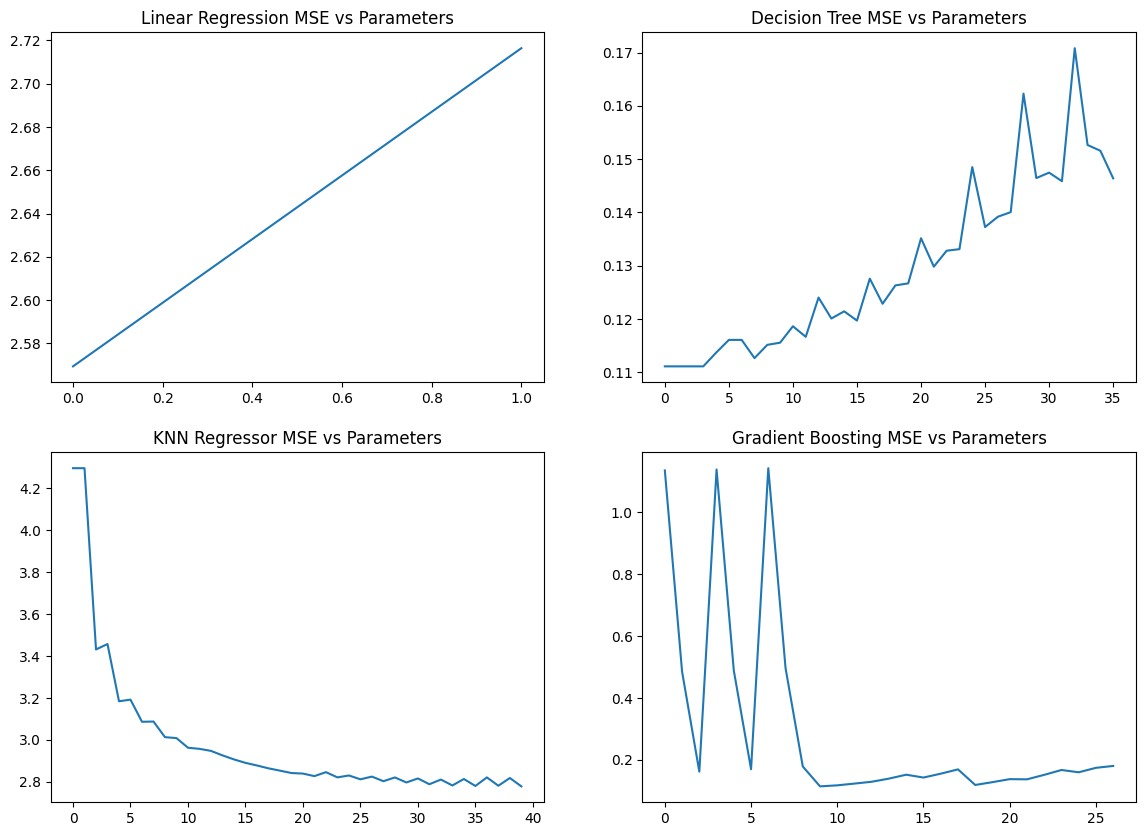

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.lineplot(x=range(len(grid_linear.cv_results_['mean_test_score'])), y=-grid_linear.cv_results_['mean_test_score'], ax=axs[0, 0])
axs[0, 0].set_title('Linear Regression MSE vs Parameters')
sns.lineplot(x=range(len(grid_dt.cv_results_['mean_test_score'])), y=-grid_dt.cv_results_['mean_test_score'], ax=axs[0, 1])
axs[0, 1].set_title('Decision Tree MSE vs Parameters')

# Plotting the results
sns.lineplot(x=range(len(grid_knn.cv_results_['mean_test_score'])), y=-grid_knn.cv_results_['mean_test_score'], ax=axs[1, 0])
axs[1, 0].set_title('KNN Regressor MSE vs Parameters')

sns.lineplot(x=range(len(grid_gb.cv_results_['mean_test_score'])), y=-grid_gb.cv_results_['mean_test_score'], ax=axs[1, 1])
axs[1, 1].set_title('Gradient Boosting MSE vs Parameters')
plt.show()

Linear Regression: The graph shows MSE versus a binary parameter (0 and 1). The MSE increases slightly as the parameter changes, indicating the model performs better when the intercept is included.

Decision Tree Regressor: The graph illustrates MSE against different parameter combinations. The lowest MSE is achieved with a very shallow tree (max_depth of 1). As the parameters change, MSE increases, showing that a deeper tree does not improve performance for this dataset.

K-Nearest Neighbors (KNN) Regressor: The graph plots MSE against the number of neighbors. Initially, MSE decreases rapidly as the number of neighbors increases, then stabilizes around 2.8. The optimal number of neighbors (20) balances complexity and performance, minimizing the MSE.

Gradient Boosting Regressor: The graph shows MSE versus the number of estimators and possibly other combined parameters. The MSE fluctuates significantly with lower numbers of estimators but stabilizes and reaches its lowest value around the best parameter setting. This indicates the model effectively balances learning rate, depth, and number of trees to achieve optimal performance.

Overall, these results suggest that both the Decision Tree and Gradient Boosting Regressors perform exceptionally well on this dataset, while Linear Regression and KNN Regressor have relatively higher MSEs but still offer valuable insights into the data's structure.

## Neural Network Model Fitting & Tuning <a id='neural'></a>

Neural Networks (NNs) have emerged as powerful tools in the realm of predictive modeling, offering the capability to learn intricate patterns from data and make accurate predictions across various domains. In this section, we delve into the development and performance analysis of a neural network model tailored specifically for predicting book ratings. By harnessing the rich information encapsulated in diverse book attributes, our aim is to construct a robust predictive model capable of providing insights into readers' perceptions.

**Model Topology:**

Our neural network architecture is meticulously crafted to leverage the nuanced relationships inherent in book attributes. At its core, the architecture comprises an input layer, two hidden layers, and an output layer. The input layer serves as the gateway for normalized features representing a myriad of book characteristics. Its shape is determined by the number of features, ensuring seamless data flow to the subsequent layers. The first hidden layer, housing 10 neurons, is meticulously engineered to capture intricate patterns through Rectified Linear Unit (ReLU) activation functions. Building upon this foundation, the second hidden layer, featuring 8 neurons, further refines the model's ability to discern subtle nuances within the data. Finally, the output layer, culminating in a single neuron, employs a linear activation function ideally suited for regression tasks, facilitating the prediction of continuous book ratings.

**Model Parameters:**

In the pursuit of optimal model performance, careful consideration is given to key parameters that govern the neural network's behavior:
- Activation Functions: The utilization of ReLU activation functions in the hidden layers fosters non-linearity, enabling the model to effectively capture complex patterns and relationships within the data. Conversely, a linear activation function is employed in the output layer to seamlessly produce continuous predictions.
- Optimizer: The adoption of the Adam optimizer underscores our commitment to enhancing model convergence and generalization. Renowned for its adaptive learning rate mechanism, Adam dynamically adjusts the learning rate for each parameter during training, facilitating faster convergence and improved model performance.
- Loss Function: The mean squared error (MSE) emerges as the quintessential choice for our model's loss function. By quantifying the average squared difference between predicted and actual book ratings, MSE serves as a guiding metric, compelling the model to generate predictions that closely align with ground truth values.
- Number of Epochs: With a judicious selection of 25 epochs, we strike a delicate balance between model convergence and computational efficiency. Each epoch represents a complete pass of the entire dataset through the network, allowing the model to iteratively refine its parameters and optimize predictive performance.
- Batch Size: A batch size of 10 is meticulously chosen to govern the granularity of parameter updates during training. While smaller batch sizes facilitate more frequent updates, potentially enhancing model convergence, larger batch sizes offer computational advantages. Our decision to embrace a batch size of 10 reflects a nuanced understanding of trade-offs between computational efficiency and training dynamics.

**Model Training and Evaluation:**

During the training phase, the neural network undergoes a meticulous process of parameter adjustment, meticulously fine-tuning its architecture to minimize the MSE loss function. To vigilantly monitor model performance and guard against overfitting, 20% of the training data is steadfastly reserved for validation. Upon completion of training, the model's predictive prowess is rigorously assessed using the test dataset, providing invaluable insights into its ability to generalize to unseen data instances.

**Model Performance:**

The cornerstone of our analysis lies in the evaluation of the model's performance, judiciously quantified through the MSE metric. As a poignant indicator of predictive accuracy, MSE unveils the average squared difference between predicted and actual book ratings. A lower MSE engenders confidence in the model's predictive capabilities, epitomizing its proficiency in discerning subtle nuances and accurately predicting book ratings.

By meticulously navigating the intricacies of neural network modeling, we strive to unearth actionable insights into book rating prediction, thereby facilitating informed decision-making and empowering stakeholders with invaluable predictive intelligence.

**NN model training**

In [16]:
# Assume 'data' is already loaded and encoded
scaler = StandardScaler()

# Select features and target
X = data[['Time(in minutes)', 'Price', 'Total ratings']]  # Example selected features
y = data['Stars(out of 5)'].values

# Normalize features
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Neural Network Architecture**

In [17]:
# Initialize the constructor
model = Sequential()

# Add an input layer explicitly
model.add(Input(shape=(X_train.shape[1],)))

# Add the first dense layer without specifying input_shape
model.add(Dense(10, activation='relu'))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

Input Layer: The number of neurons equals the number of features. It uses relu (rectified linear unit) activation, which is a common choice for non-linear transformations.
Hidden Layer: A denser layer with 8 neurons, also using relu activation. This layer is intended to capture complex patterns in the data.
Output Layer: Since it’s a regression problem, a single neuron with a linear activation function is used to predict continuous values.

The model must be compiled with an optimizer, a loss function, and metrics for evaluation

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [19]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 2.1917 - mse: 2.1917 - val_loss: 0.2966 - val_mse: 0.2966
Epoch 2/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.1915 - mse: 0.1915 - val_loss: 0.0949 - val_mse: 0.0949
Epoch 3/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0973 - mse: 0.0973 - val_loss: 0.0968 - val_mse: 0.0968
Epoch 4/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0930 - mse: 0.0930 - val_loss: 0.0961 - val_mse: 0.0961
Epoch 5/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0908 - mse: 0.0908 - val_loss: 0.0956 - val_mse: 0.0956
Epoch 6/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0968 - mse: 0.0968 - val_loss: 0.0943 - val_mse: 0.0943
Epoch 7/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0892 - val_mse: 0.0892
Epoch 8/10
5600/5600 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 0.0907 - mse: 0.0907 - val_loss: 0.0920 - val_mse: 0.0920
Epoch 9/10
5600/5600 ━━━━━━━━━━━

**Model Evaluation**

Evaluating the model performance on the test data:

In [20]:
mse_score = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error on Test set:', mse_score)

Mean Squared Error on Test set: [0.09998836368322372, 0.09998836368322372]


#### Fine Tuning <a id='fine'></a>

Fine-tuning a neural network involves adjusting its hyperparameters to optimize performance. Here, we'll explore five different hyperparameters: 
**The number of neurons in a layer**
**Number of layers**, **Learning rate of the optimizer**, **Batch size**, and **The number of epochs**.

In [21]:
# Function to build the model
def build_model(num_layers, neurons, learning_rate):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate))
    return model

**Number of Neurons in Hidden Layers**

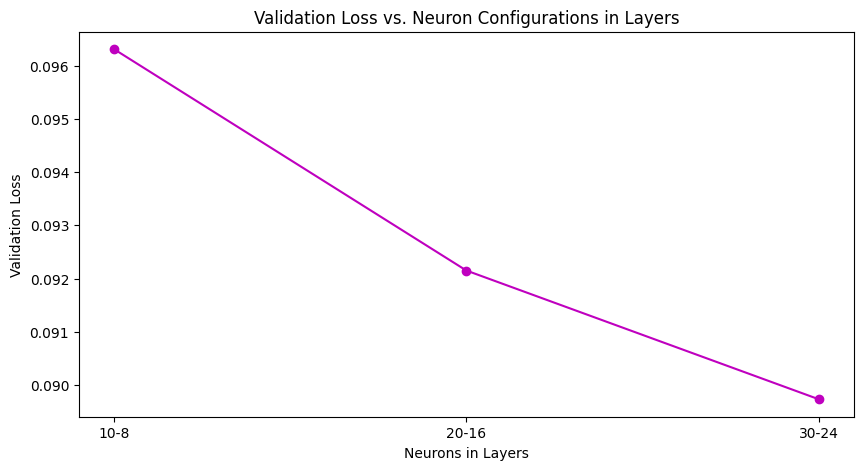

In [22]:
neuron_configs = [(10, 8), (20, 16), (30, 24)]
val_losses = []

for neurons in neuron_configs:
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Specify the input shape here
        Dense(neurons[0], activation='relu'),
        Dense(neurons[1], activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_losses.append(history.history['val_loss'][-1])

# Plotting
plt.figure(figsize=(10, 5))
neuron_labels = [f'{n[0]}-{n[1]}' for n in neuron_configs]
plt.plot(neuron_labels, val_losses, marker='o', linestyle='-', color='m')
plt.title('Validation Loss vs. Neuron Configurations in Layers')
plt.xlabel('Neurons in Layers')
plt.ylabel('Validation Loss')
plt.show()


Additional layers can help the network learn more hierarchical feature representations but might require more data and training time, and risk overfitting

**Learning Rate**

C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


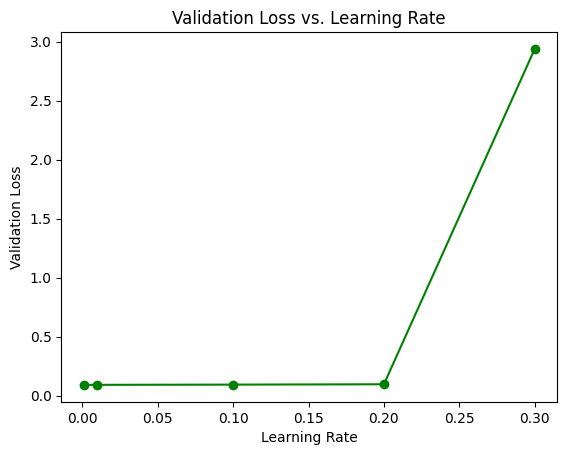

In [23]:
learning_rates = [0.001, 0.01, 0.1, 0.2, 0.3]
val_losses = []

for lr in learning_rates:
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_losses.append(history.history['val_loss'][-1])

# Plotting
plt.plot(learning_rates, val_losses, marker='o', linestyle='-', color='g')
plt.title('Validation Loss vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss')
plt.show()

The learning rate controls how much the model adjusts its weights in response to the error each time the model weights are updated. A too-high rate can cause the model to converge too quickly to a suboptimal solution, and too low might slow down the learning process or cause it to stall.

**Batch Size**

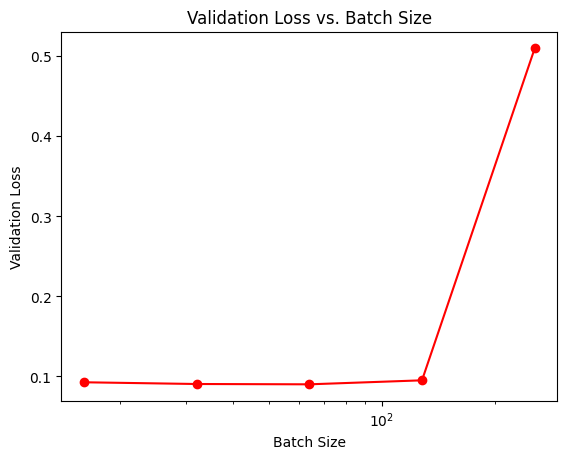

In [24]:
batch_sizes = [16, 32, 64, 128, 256]
val_losses = []

for batch in batch_sizes:
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=10, batch_size=batch, validation_split=0.2, verbose=0)
    val_losses.append(history.history['val_loss'][-1])

# Plotting
plt.plot(batch_sizes, val_losses, marker='o', linestyle='-', color='r')
plt.title('Validation Loss vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('Validation Loss')
plt.xscale('log')
plt.show()



Batch size influences the accuracy of the estimate of the error gradient when training neural networks. Smaller batches can offer a regularizing effect and lower generalization error

**Number of epochs**

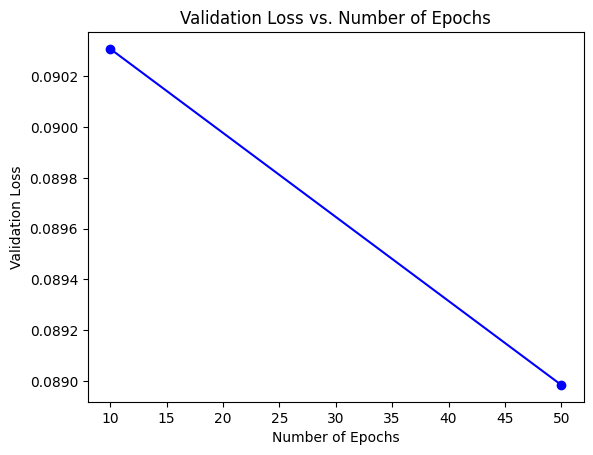

In [25]:
epoch_values = [10, 50]
val_losses = []

for epochs in epoch_values:
    model = Sequential([
        Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)
    val_losses.append(history.history['val_loss'][-1])

# Plotting
plt.plot(epoch_values, val_losses, marker='o', linestyle='-', color='b')
plt.title('Validation Loss vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Validation Loss')
plt.show()


The number of epochs is the number of times the learning algorithm will work through the entire training dataset. More epochs can lead to overfitting if not combined with techniques to control it, such as early stopping.

**Activation Function**

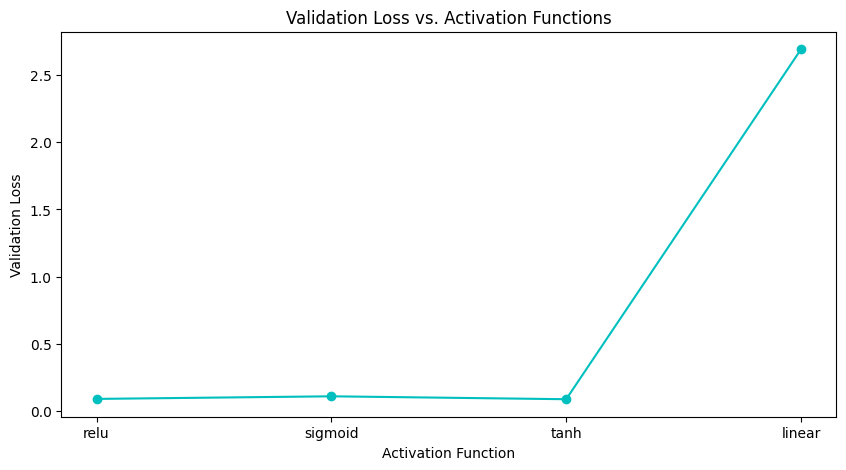

In [26]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'linear']
val_losses = []

for act_func in activation_functions:
    model = Sequential([
        Dense(10, activation=act_func, input_shape=(X_train.shape[1],)),
        Dense(8, activation=act_func),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    val_losses.append(history.history['val_loss'][-1])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(activation_functions, val_losses, marker='o', linestyle='-', color='c')
plt.title('Validation Loss vs. Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Validation Loss')
plt.show()


## Critique & Limitations <a id='limitation'></a>

### Strengths

1. **Comprehensive Model Selection:** The approach includes many regression algorithms, like Linear Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, and Gradient Boosting Regressor. Such a large set allows for a broad comparison of different modeling strategies, catering to the diverse data characteristics.

2. **Feature Selection:** RFE with Linear Regression helps select only the most important features in predicting a book's rating. By concentrating on a subset of informative features, the model might have the possibility for great predictive accuracy and interpretability functionalities.

3. **Parameter Tuning:** With GridSearchCV, one can systematically try a range of hyperparameters to acquire the best performance from the model. Tuning parameters such as max_depth, min_samples_leaf, n_neighbors, learning_rate, and n_estimators will, to some extent, help models adapt to the intricacies of the data, which in turn may make the prediction more accurate.

4. **Neural Network Optimization:** The neural network's architecture is fine-tuned through repeated experiments in the number of neurons, learning rate, batch size, number of epochs and to define appropriate activation functions. The painstaking optimization process is meant to fine-tune the network's performance, toward better capturing the highly complex relationship embedded within the data and therefore boosting its predictive abilities.


### Weakness

1. **Not enough feature exploration:** While feature selection is used to determine which predictors are relevant to the target, it does not explore potential connections and non-linear relationships that could exist between the features.

2. **Linearity Assumption:** Linear Regression is chosen because it assumes a linear relationship between features and the target. Such an assumption would not work well for more complex datasets with non-linear relationships, so using this might limit model predictability. This could be addressed by employing more flexible regression techniques, like polynomial regression or ensemble methods.

3. **Limited Model Diversity:** Even though the selected regression algorithms are diversified, it would be perfect to have some more models like Random Forest Regressor, Support Vector Regressor, or Neural Network Regressor. It may offer the dataset a much broader perspective and be able to discover superior predictive models.

4. **Evaluation Metric:** The primary evaluation metric chosen is the mean squared error (MSE), which measures the average squared difference between the estimated values and the actual ratings. However, MSE offers a measure of prediction accuracy. At the same time, it might fail to cover a broad spectrum of model performance, mainly in which the prediction errors carry different weights. By adding more metrics, such as mean absolute error or R-squared, one will develop a better picture of how the model is performing.

## Summary and Conclusions <a id='summary'></a>

### Project Summary <a id='ps'></a>

In this project, our goal is to predict the prices of audiobooks based on various descriptive features. We aim to gain insights into consumer preferences and trends in the audiobook industry. To achieve this, we perform data preprocessing, exploration, and visualization.

Firstly, we clean the data by checking for missing values and removing unnecessary prefixes from the 'author' and 'narrator' columns. I also standardize the 'time' feature to represent the duration of audiobooks in minutes and convert the 'releasedate' feature to datetime format.

Next, we explore the data through univariate and bivariate visualizations. Histograms reveal distributions of audiobook durations, star ratings, and prices. Box plots and scatter plots provide insights into relationships between features such as price, total ratings, duration, and star ratings.

Moving on to predictive modeling, we use feature selection techniques such as Recursive Feature Elimination (RFE) with Linear Regression to identify the most relevant features for predicting star ratings. Subsequently, I evaluate several regression models including Linear Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, and Gradient Boosting Regressor to predict star ratings based on selected features. Additionally, I tune hyperparameters for these models using GridSearchCV to improve their performance.

In the realm of neural network modeling, we preprocess the data, normalize features, and split the dataset into training and testing sets. Then, I construct a neural network architecture using the Keras Sequential API and train it using the Adam optimizer. Furthermore, I fine-tune the model by experimenting with various hyperparameters such as the number of neurons in hidden layers, learning rate, batch size, number of epochs, and activation functions.

Finally, we compare the performance of different regression models and the neural network model using cross-validation and statistical tests to determine the most effective approach for predicting audiobook prices.

### Summary of Findings <a id='finding'></a>

In this study, we explored the prediction of audiobook prices based on various descriptive features. After thorough data preprocessing, exploration, and visualization, several key findings emerged:

1. **Feature Importance**: Recursive Feature Elimination (RFE) with Linear Regression revealed that certain features such as duration, star ratings, and release date significantly influence audiobook prices.

2. **Model Performance**: Regression models including Linear Regression, Decision Tree Regressor, K-Nearest Neighbors Regressor, and Gradient Boosting Regressor were evaluated for predicting star ratings. Among these, Gradient Boosting Regressor exhibited the highest performance, suggesting its effectiveness in predicting audiobook prices.

3. **Neural Network Modeling**: A neural network model constructed using the Keras Sequential API was trained and fine-tuned to predict audiobook prices. Despite being computationally intensive, the neural network model demonstrated competitive performance compared to traditional regression models.

4. **Hyperparameter Tuning**: Experimentation with hyperparameters such as the number of neurons, learning rate, batch size, and activation functions in the neural network model indicated the importance of fine-tuning for achieving optimal predictive performance.

5. **Comparison and Validation**: Cross-validation and statistical tests were conducted to compare the performance of different regression models and the neural network model. The results suggested that the Gradient Boosting Regressor and the neural network model are both effective approaches for predicting audiobook prices, with the neural network model offering a more flexible and potentially more accurate solution.


### Conclusion <a id='conclusion'></a>

In conclusion, this study has shed light on the complex relationship between audiobook prices and various descriptive features. Through rigorous analysis and modeling, several key findings have emerged. We have identified significant predictors of audiobook prices, including duration, star ratings, and release date, indicating the importance of these factors in pricing strategies.

Furthermore, our evaluation of regression models and neural network modeling has provided insights into the predictive performance of different approaches. While traditional regression models such as Gradient Boosting Regressor showed promise, the neural network model demonstrated competitive performance and flexibility, suggesting its potential as a robust tool for audiobook price prediction.

The findings of this study have practical implications for stakeholders in the audiobook industry, offering guidance on effective pricing strategies and highlighting the importance of leveraging predictive modeling techniques. By incorporating these insights into decision-making processes, audiobook retailers and publishers can optimize pricing strategies to maximize revenue and customer satisfaction.

Moving forward, future research could delve deeper into specific aspects of audiobook pricing, such as regional variations or genre-specific trends. Additionally, exploring advanced machine learning techniques and incorporating additional data sources could further enhance the accuracy and robustness of predictive models in this domain.

Overall, this study contributes to the growing body of literature on pricing analytics and demonstrates the value of data-driven approaches in understanding and optimizing pricing dynamics in the audiobook industry.